In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [31]:
df_por = pd.read_pickle('./brazilstudents.pkl')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,student_performance
0,GP,F,18,U,GT3,A,4,4,course,mother,...,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,course,father,...,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,other,mother,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,home,mother,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,home,father,...,no,4,3,2,1,2,5,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,course,mother,...,no,5,4,2,1,2,5,4,10,1
645,MS,F,18,U,LE3,T,3,1,course,mother,...,no,4,3,4,1,1,1,4,16,2
646,MS,F,18,U,GT3,T,1,1,course,mother,...,no,1,1,1,1,1,5,6,9,0
647,MS,M,17,U,LE3,T,3,1,course,mother,...,no,2,4,5,3,4,2,6,10,1


In [32]:
df_por.drop(columns = ['G3'], inplace = True)

In [33]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'student_performance'],
      dtype='object')

In [34]:
num_cats = ['age', 'absences', 'failures' ] #Removed G3 for pipeline prediction reasons
nominal_cats = ['school', 'sex', 'address', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', ]
ordinal_cats = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Medu', 'Fedu', 'studytime', 'traveltime']

In [35]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy= 'mean')), ('numnorm', StandardScaler())])

ordinal_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')), 
    ('ordnorm', StandardScaler())
    ])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())
])

In [36]:
ct = ColumnTransformer(
    [("ordinal_pipe", ordinal_pipeline, ordinal_cats),
    ("nominal_pipe", nominal_pipeline, nominal_cats),
    ("numeric_pipe", numeric_pipeline, num_cats)]
)

In [37]:
ct

ColumnTransformer(transformers=[('ordinal_pipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 ['famrel', 'freetime', 'goout', 'Dalc', 'Walc',
                                  'health', 'Medu', 'Fedu', 'studytime',
                                  'traveltime']),
                                ('nominal_pipe',
                                 Pipeline(steps=[('onehotimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                              

In [38]:
k_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', KNeighborsClassifier())
])


In [39]:
X = df_por.drop(columns = ['student_performance'])
y = df_por['student_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 305, stratify = y)

In [40]:
k_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [75]:
y_pred = k_pipe.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


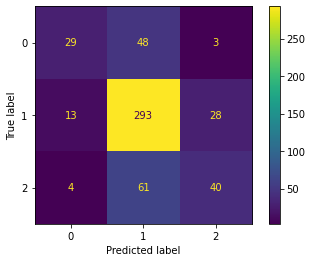

In [76]:
plot_confusion_matrix(k_pipe, X_train, y_train)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.25      0.34        20
           1       0.67      0.86      0.75        84
           2       0.38      0.19      0.26        26

    accuracy                           0.63       130
   macro avg       0.54      0.43      0.45       130
weighted avg       0.59      0.63      0.59       130



In [82]:
k_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__n_neighbors': np.arange(3, 25, 2),
                'model__p': [1, 2, 3, 4]
                }

In [83]:
gridsearch = GridSearchCV(estimator = k_pipe, param_grid= k_pipe_grid, scoring= 'accuracy')

In [84]:
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordnorm',
                                                                                          StandardScaler())]),
                                                                         ['famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                       

In [85]:
best_model = gridsearch.best_estimator_

In [86]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [49]:
y_pred_k = best_model.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        20
           1       0.65      0.94      0.77        84
           2       0.40      0.08      0.13        26

    accuracy                           0.64       130
   macro avg       0.52      0.37      0.36       130
weighted avg       0.58      0.64      0.55       130



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


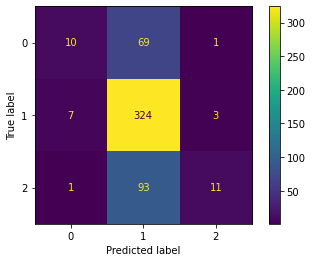

In [70]:
plot_confusion_matrix(best_model,
                      X_train,
                      y_train)

In [51]:
naive_bayes_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', GaussianNB())
])


In [52]:
naive_bayes_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [53]:
y_pred_NB = naive_bayes_pipe.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


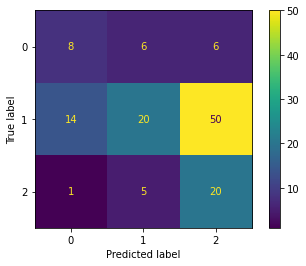

In [54]:
plot_confusion_matrix(naive_bayes_pipe, X_test, y_test)

In [55]:
dtree_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', DecisionTreeClassifier())
])


In [56]:
dtree_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [57]:
y_pred_dtree = dtree_pipe.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


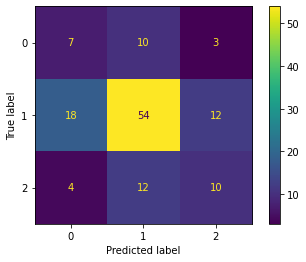

In [58]:
plot_confusion_matrix(dtree_pipe, X_test, y_test)

In [59]:
dtree_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__max_depth': np.arange(3, 25, 2),
                'model__min_samples_leaf': [2,3,4,5,6,7,8,9,10],
                'model__criterion': ['gini', 'entropy'],
                }

In [60]:
dtree_gridsearch = GridSearchCV(estimator = dtree_pipe, param_grid= dtree_pipe_grid, scoring= 'accuracy')

In [61]:
dtree_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordnorm',
                                                                                          StandardScaler())]),
                                                                         ['famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                       

In [62]:
dtree_gridsearch.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 3,
 'model__min_samples_leaf': 2,
 'preprocessing__numeric_pipe__numimputer__strategy': 'mean'}

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


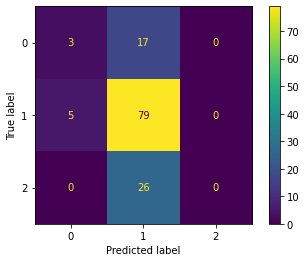

In [90]:
best_dtree = dtree_gridsearch.best_estimator_
y_preds_tree = best_dtree.predict(X_test)
plot_confusion_matrix(best_dtree, X_test, y_test)

In [92]:
print(classification_report(y_test, y_preds_tree))

              precision    recall  f1-score   support

           0       0.38      0.15      0.21        20
           1       0.65      0.94      0.77        84
           2       0.00      0.00      0.00        26

    accuracy                           0.63       130
   macro avg       0.34      0.36      0.33       130
weighted avg       0.48      0.63      0.53       130



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [93]:
randomforest_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', RandomForestClassifier())
])

In [94]:
randomforest_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


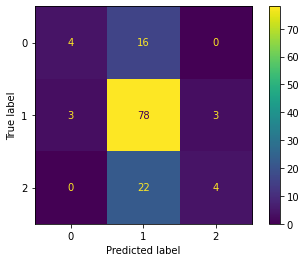

In [98]:
y_pred_randomforest = randomforest_pipe.predict(X_test)
plot_confusion_matrix(randomforest_pipe, X_test, y_test)

In [99]:
print(classification_report(y_test, y_pred_randomforest))

              precision    recall  f1-score   support

           0       0.57      0.20      0.30        20
           1       0.67      0.93      0.78        84
           2       0.57      0.15      0.24        26

    accuracy                           0.66       130
   macro avg       0.61      0.43      0.44       130
weighted avg       0.64      0.66      0.60       130



In [100]:
dforest_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__n_estimators': np.arange(300, 1000, 100),
                'model__max_depth': np.arange(3, 25, 4),
                'model__criterion': ['gini', 'entropy'],
                }

In [101]:
randomforest_cv = GridSearchCV(estimator = randomforest_pipe, param_grid = dforest_pipe_grid, cv = 5)

In [102]:
randomforest_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordnorm',
                                                                                          StandardScaler())]),
                                                                         ['famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                    

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


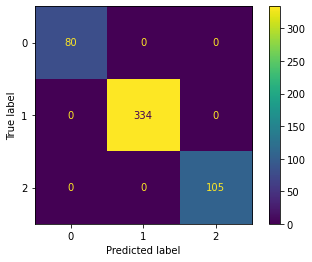

In [103]:
plot_confusion_matrix(randomforest_cv.best_estimator_, X_train, y_train)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


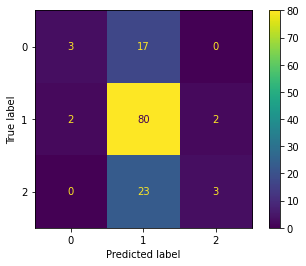

In [104]:
plot_confusion_matrix(randomforest_cv.best_estimator_, X_test, y_test)